In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Jednodimenzionalne gradijentne metode

## Njutn Rapson

1. početna tačka $x_0$
2. iterativni korak $x_{k+1} = x_k - \frac{f'(x_0)}{f''(x_0)}$
3. kriterijum zaustavljanja $|x_{k+1} - x_k| < \varepsilon$

In [2]:
def newtn_rapson(f, df, ddf, x0, epsilon = 1e-6, max_iter = 100):
    x = x0
    iter_count = 0
    for _ in range(max_iter):
        iter_count += 1
        x_before = x
        x = x - df(x) / ddf(x)
        if abs(x - x_before) < epsilon:
            break
    return x, f(x), iter_count

def newton_raphson_bojana(f, df, ddf, x, epsilon):
    x1 = x
    x = math.inf
    while abs(x1 - x) > epsilon:
        x = x1
        x1 = x - df(x) / ddf(x)
    return x1

def newtn_rapson_step(f, df, ddf, x0, epsilon = 1e-6, max_iter = 100):
    x = [x0]
    iter_count = 0
    for _ in range(max_iter):
        iter_count += 1
        x.append( x[-1] - df(x[-1]) / ddf(x[-1]))
        if abs(x[-1] - x[-2]) < epsilon:
            break
    return x

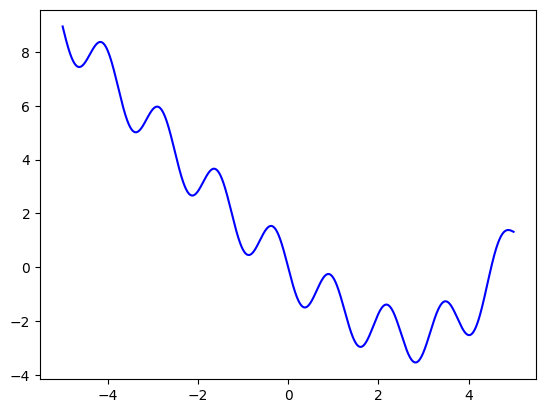

In [3]:
x = np.arange(-5, 5, 0.001)
def f(x):
    return np.sqrt(np.exp(x)) - np.sin(5*x) - 2*x - 1
def df(x):
    return np.sqrt(np.exp(x)) / 2  - 5 * np.cos(5 * x) - 2
def ddf(x):
    return np.sqrt(np.exp(x)) / 4 + 25 * np.sin(5 * x)

plt.plot(x, f(x), "b")
# plt.plot(x, df(x), "r")
# plt.plot(x, ddf(x), "g")
plt.show()

-0.874070746022423 0.4520160901622723 4


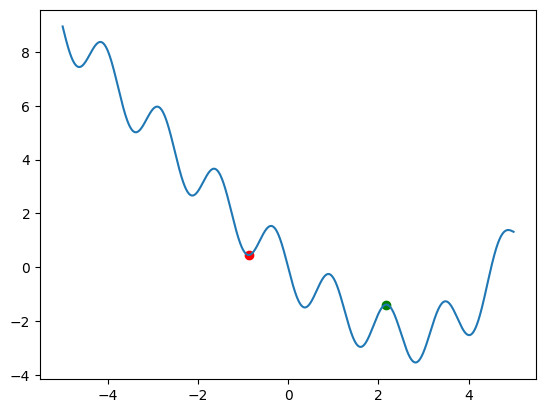

In [4]:
x_opt, y_opt, iter_count = newtn_rapson(f, df, ddf, -1)
print(x_opt, y_opt, iter_count)
plt.plot(x, f(x))
plt.scatter(x_opt, y_opt, c="r")
x_opt = newton_raphson_bojana(f, df, ddf, 0, 1e-6)
plt.scatter(x_opt, f(x_opt), c="g")
plt.show()

[0, np.float64(26.0), np.float64(23.99958092137637), np.float64(22.000441530251003), np.float64(20.000086368912587), np.float64(17.99663055046667), np.float64(16.018590667609047), np.float64(13.952473641262259), np.float64(12.080273632388), np.float64(9.692075100792588), np.float64(1.3126076181963775), np.float64(2.103380848877545), np.float64(2.184138562399178), np.float64(2.1785265785439907), np.float64(2.178519956820266), np.float64(2.178519956808929)]


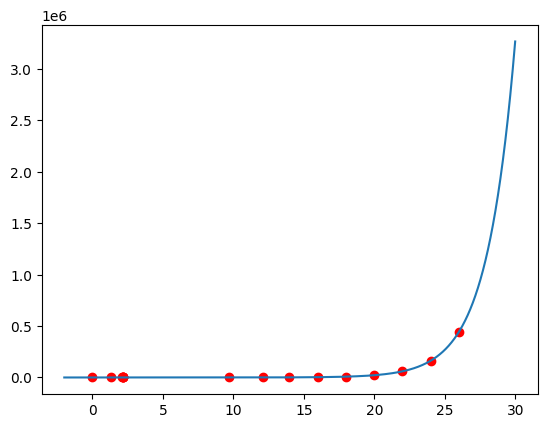

In [5]:
steps = newtn_rapson_step(f, df, ddf, 0)
print(steps)
plt.plot(np.arange(-2, 30, 0.001), f(np.arange(-2, 30, 0.001)))
plt.scatter(np.array(steps), f(np.array(steps)), c="r")
plt.show()

## Metod sečice

1. inicijalizacija $x_0, x_1$
2. iterativni korak $x_{k+1} = x_k - f'(x_k)\frac{x_k - x_{k-1}}{f'(x_k) - f'(x_{k-1})}$
3. kriterijum zaustavljanja $|x_{k+1} - x_k| < \varepsilon$

In [6]:
def bisect(f, df, x0, x1, epsilon=1e-6, max_iter=100):
    xb = x0
    xc = x1
    iter_count = 0
    for _ in range(max_iter):
        iter_count += 1
        xb, xc = xc, xc - df(xc) * (xc - xb) / (df(xc) - df(xb))
        if abs(xc - xb) < epsilon:
            break
    return xc, f(xc), iter_count

def metod_secice_bojana(f, df, x0, x, epsilon):
    x1 = x
    x = x0
    while abs(x1 - x) > epsilon:
        x0 = x
        x = x1
        x1 = x - df(x) * (x - x0) / (df(x) - df(x0))
    return x1

0.8932424420359715 -0.25361151659834436 13


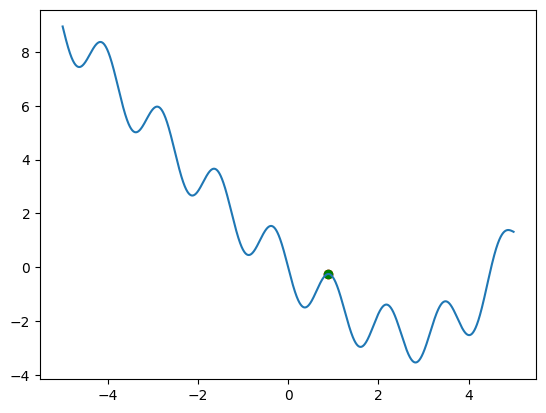

In [7]:
x_opt, y_opt, iter_count = bisect(f, df, 0, 3)
print(x_opt, y_opt, iter_count)
plt.plot(x, f(x))
plt.scatter(x_opt, y_opt, c="r")
x_opt = metod_secice_bojana(f, df, 0, 3, 1e-6)
plt.scatter(x_opt, f(x_opt), c="g")
plt.show()

# Jednodimenzionalne metode direktnog pretraživanja

## Fibonačijev metod

In [8]:
fib_cache = {0: 0, 1: 1}

def fib(n):
    if n in fib_cache:
        return fib_cache[n]
    fib_cache[n] = fib(n - 1) + fib(n - 2)
    return fib_cache[n]

In [9]:
for i in range(10):
    print(f"{i}:{fib(i)}", end="\t")

0:0	1:1	2:1	3:2	4:3	5:5	6:8	7:13	8:21	9:34	

In [10]:
def fib_method(f, a, b, epsilon = 1e-6):
    n = 1
    end = (b - a) / epsilon
    while fib(n) < end:
        n += 1

    for i in range(2, n):
        x1 = a + fib(n-i) / fib(n-i+2) * (b-a)
        x2 = a + b - x1
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1

    x_opt = a if f(a) < f(b) else b
    return x_opt, f(x_opt), n

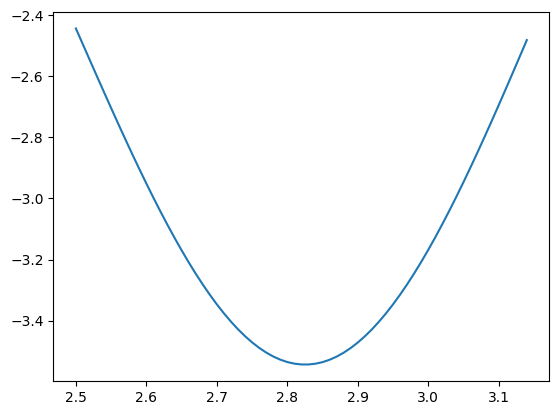

In [11]:
a, b = 2.5, 3.15
x_ds = np.arange(a, b, 0.01)
plt.plot(x_ds, f(x_ds))

2.825296860727849 -3.5437190283125304 30


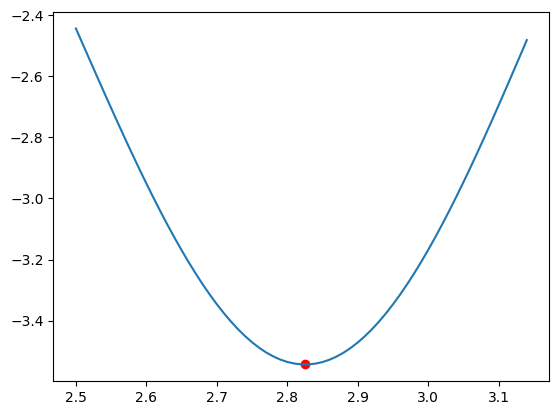

In [12]:
x_opt, y_opt, iter_count = fib_method(f, a, b, 1e-6)
print(x_opt, y_opt, iter_count)
plt.plot(x_ds, f(x_ds))
plt.scatter(x_opt, y_opt, c="r")

## Metod zlatnog preseka

In [13]:
def golden(f, a, b, epsilon = 1e-6):
    c = (3 - math.sqrt(5))/2
    iter_count = 0
    while abs(a - b) >= epsilon:
        iter_count += 1
        x1 = a + c * (b-a)
        x2 = a + b - x1

        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
    x_opt = a if f(a) < f(b) else b
    return x_opt, f(x_opt), iter_count

2.825296737430098 -3.5437190283119193 28


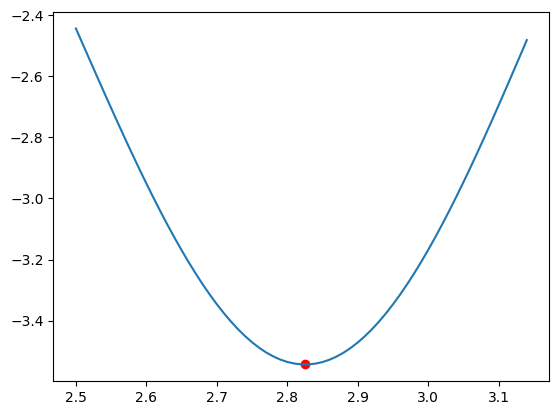

In [14]:
x_opt, y_opt, iter_count = golden(f, a, b, 1e-6)
print(x_opt, y_opt, iter_count)
plt.plot(x_ds, f(x_ds))
plt.scatter(x_opt, y_opt, c="r")

# Višedimenzionalne gradijentne metode

# Gradient descent

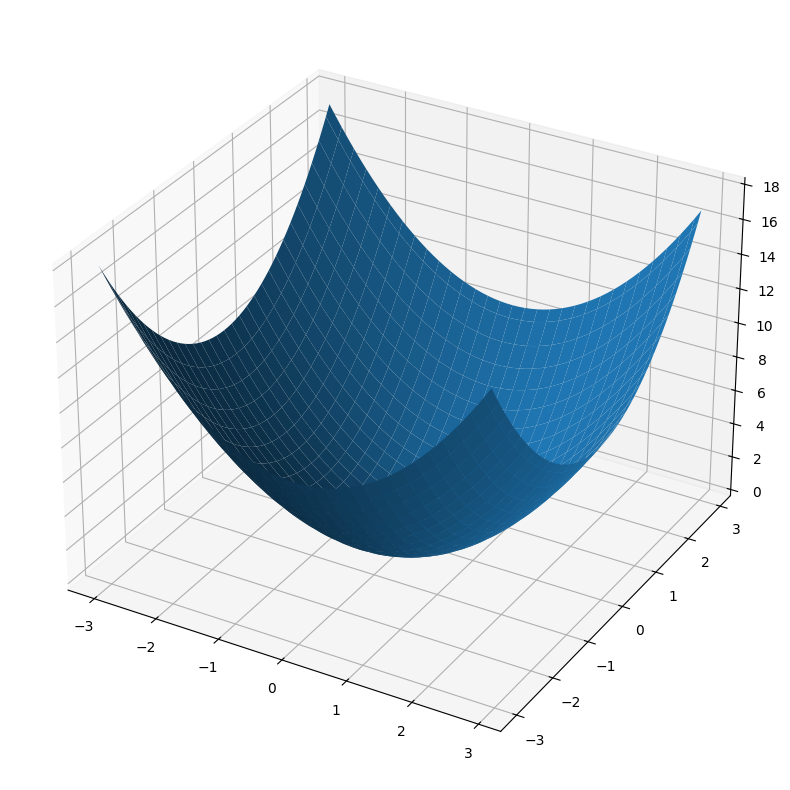

In [22]:
def fn(x):
    x12 = x[0]**2
    x22 = x[1]**2
    return x12 + x22

def gradf(x):
    x = x.reshape(x.size)
    return np.array([
        [2 * x[0]],
        [2 * x[1]]
    ])

x1 = np.arange(-3, 3, 0.1)
x2 = np.arange(-3, 3, 0.1)

x1, x2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x1, x2, fn([x1, x2]))

In [16]:
def grad_desc(f, grad, x0, gamma = 0.1, epsilon = 1e-6, max_iter=100):
    x = np.array(x0).reshape((len(x0), 1))
    iter_count = 0
    for _ in range(max_iter):
        iter_count += 1
        g = grad(x)
        x = x - gamma * g
        if np.linalg.norm(g) < epsilon:
            break
    return x, f(x), iter_count

[[-2.63280729e-07]
 [ 2.63280729e-07]] [1.38633485e-13] 70


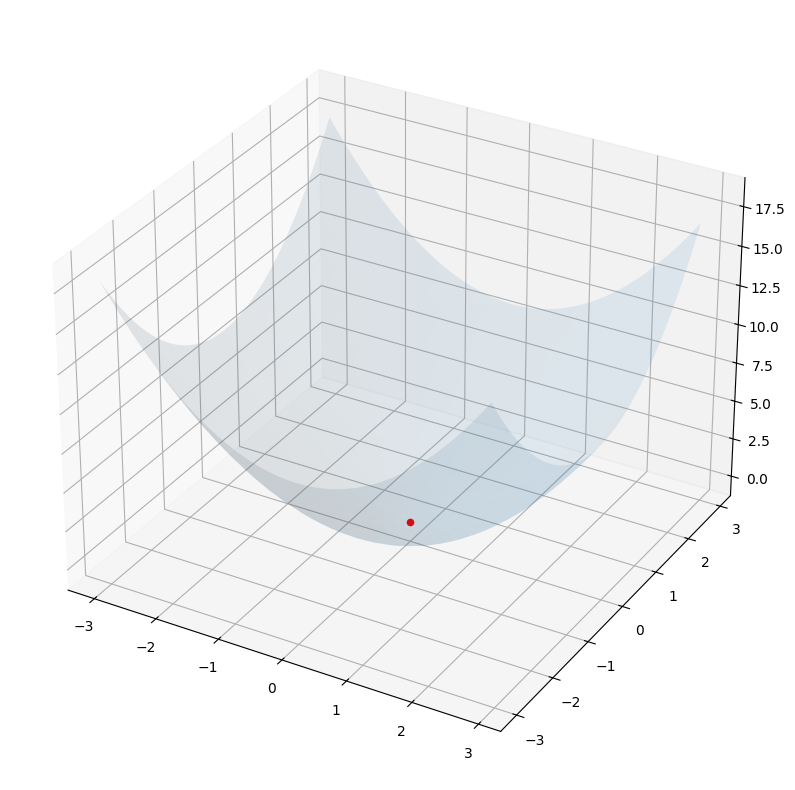

In [25]:
x_opt, y_opt, iter_count = grad_desc(fn, gradf, [-1.6,1.6])
print(x_opt, y_opt, iter_count)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x1, x2, fn(np.array([x1, x2])), alpha=0.1)
ax.scatter3D([x_opt[0]], [x_opt[1]], [y_opt], c="r")

## GD With momentum